In [1]:
#Necessary Imports
import os
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import nibabel as nib

from scipy import ndimage

In [2]:
#Functions
def read_nifti_file(filepath):
    """Read and load volume"""
    # Read file
    scan = nib.load(filepath)
    # Get raw data
    scan = scan.get_fdata()
    return scan


def normalize(volume):
    """Normalize the volume"""
    min = -1000
    max = 400
    volume[volume < min] = min
    volume[volume > max] = max
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume


def resize_volume(img):
    """Resize across z-axis"""
    # Set the desired depth
    desired_depth = 64
    desired_width = 128
    desired_height = 128
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    # Rotate
    img = ndimage.rotate(img, 90, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img


def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = read_nifti_file(path)
    # Normalize
    volume = normalize(volume)
    # Resize width, height and depth
    volume = resize_volume(volume)
    return volume


In [3]:
dt = pd.read_csv(r"E:\TuberculosisTypeClassification\labellingData.csv")
type1=[]
type2=[]
type3=[]
type4=[]
type5=[]
for i in range(len(dt.head(200))):
    if (dt.iloc[i]['TypeOfTB']==1):
        type1.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==2):
        type2.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==3):
        type3.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==4):
        type4.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==5):
        type5.append(dt.iloc[i]['FileName'])
        


In [4]:
#all_scans contain all the ct scans
all_scan_path = [
    os.path.join(os.getcwd(), r"E:\TuberculosisTypeClassification\test_scans", TRN_) ###issue
    for TRN_ in os.listdir(r"E:\TuberculosisTypeClassification\test_scans")
]

temp_all_path=[]
for i in range(len(all_scan_path)):
    temp=all_scan_path[i].split("test_scans\\")
    #print(temp[1])
    temp_all_path.append(temp[1])

print("Number of CT Scans for TB Type Classification " + str(len(all_scan_path)))


Number of CT Scans for TB Type Classification 200


In [5]:
i=0
type2paths=[]
type1paths=[]
type3paths=[]
type4paths=[]
type5paths=[]


for i in range(len(type1)):
    temptype1="E:\\TuberculosisTypeClassification\\test_scans\\"+type1[i]
    type1paths.append(temptype1)
for i in range(len(type2)):
    temptype2="E:\\TuberculosisTypeClassification\\test_scans\\"+type2[i]
    type2paths.append(temptype2)
for i in range(len(type3)):
    temptype3="E:\\TuberculosisTypeClassification\\test_scans\\"+type3[i]
    type3paths.append(temptype3)
for i in range(len(type4)):
    temptype4="E:\\TuberculosisTypeClassification\\test_scans\\"+type4[i]
    type4paths.append(temptype4)
for i in range(len(type5)):
    temptype5="E:\\TuberculosisTypeClassification\\test_scans\\"+type5[i]
    type5paths.append(temptype5)



In [6]:
#path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_one_scans=np.array([process_scan(path) for path in type1paths])
  
#path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_two_scans=np.array([process_scan(path) for path in type2paths])
 
#path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_three_scans=np.array([process_scan(path) for path in type3paths])

#path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_four_scans=np.array([process_scan(path) for path in type4paths])
   
#path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_five_scans=np.array([process_scan(path) for path in type5paths])
        

In [7]:
print(len(type_one_scans))
print(len(type_two_scans))
print(len(type_three_scans))
print(len(type_four_scans))
print(len(type_five_scans))

162
15
1
17
5


In [8]:
type_one_labels = np.array([1 for _ in range(len(type_one_scans))])
type_two_labels = np.array([2 for _ in range(len(type_two_scans))])
type_three_labels = np.array([3 for _ in range(len(type_three_scans))])
type_four_labels = np.array([4 for _ in range(len(type_four_scans))])
type_five_labels = np.array([5 for _ in range(len(type_five_scans))])

# #Split data for training and validation.
x_train = np.concatenate((type_one_scans[:110], type_two_scans[:10],type_three_scans[:1], type_four_scans[:12],type_five_scans[:3]) , axis = 0)
y_train = np.concatenate((type_one_labels[:110], type_two_labels[:10],type_three_labels[:1], type_four_labels[:12],type_five_labels[:3]), axis = 0)


x_val =np.concatenate((type_one_scans[110:162], type_two_scans[10:15],type_three_scans[1:1], type_four_scans[12:17],type_five_scans[3:5]) , axis = 0)
y_val = np.concatenate((type_one_labels[110:162], type_two_labels[10:15],type_three_labels[1:1], type_four_labels[12:17],type_five_labels[3:5]), axis = 0)


print(
    "Number of samples in train and validation are %d and %d."
    % (x_train.shape[0], x_val.shape[0])
)
#print(len(x_train))
#print(len(y_train))
#print(x_train[0])
#print(y_train[0])

Number of samples in train and validation are 136 and 64.


In [9]:
import random

from scipy import ndimage


@tf.function
def rotate(volume):
    """Rotate the volume by a few degrees"""

    def scipy_rotate(volume):
        # define some rotation angles
        angles = [-20, -10, -5, 5, 10, 20]
        # pick angles at random
        angle = random.choice(angles)
        # rotate volume
        volume = ndimage.rotate(volume, angle, reshape=False)
        volume[volume < 0] = 0
        volume[volume > 1] = 1
        return volume

    augmented_volume = tf.numpy_function(scipy_rotate, [volume], tf.float32)
    return augmented_volume


def train_preprocessing(volume, label):
    """Process training data by rotating and adding a channel."""
    # Rotate volume
    volume = rotate(volume)
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


def validation_preprocessing(volume, label):
    """Process validation data by only adding a channel."""
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


#### Augmentation

In [10]:
# Define data loaders.
train_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_loader = tf.data.Dataset.from_tensor_slices((x_val, y_val))

batch_size = 2
# Augment the on the fly during training.
train_dataset = (
    train_loader.shuffle(len(x_train))
    .map(train_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)
# Only rescale.
validation_dataset = (
    validation_loader.shuffle(len(x_val))
    .map(validation_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)
print(len(train_loader))
print(len(validation_loader))

136
64


Dimension of the CT scan 1 is: (128, 128, 64, 1)
Dimension of the CT scan 2 is: (128, 128, 64, 1)
Dimension of the CT scan 3 is: (128, 128, 64, 1)
Dimension of the CT scan 4 is: (128, 128, 64, 1)


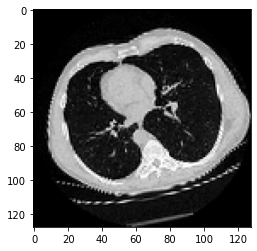

In [11]:
import matplotlib.pyplot as plt

for i in range (1,5):
    data = train_dataset.take(i)
    images, labels = list(data)[0]
    images = images.numpy()
    image = images[0]
    print("Dimension of the CT scan",i,"is:", image.shape)
    plt.imshow(np.squeeze(image[:, :, 30]), cmap="gray")



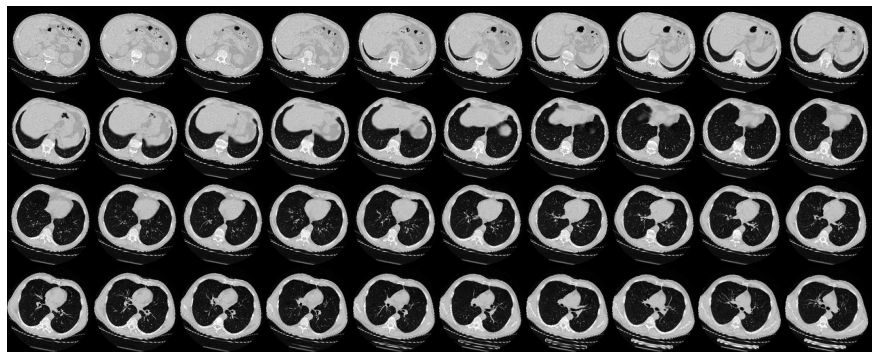

In [12]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()


# Visualize montage of slices.
# 4 rows and 10 columns for 100 slices of the CT scan.
plot_slices(4, 10, 128, 128, image[:, :, :40])


In [14]:
#!pip install keras_sequential_ascii

  Created wheel for keras-sequential-ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3067 sha256=da2cf03b656d53b882927c4db20389e9c732fc5090ff7dd31c7b7f7088cf4a6e
  Stored in directory: c:\users\rdais\appdata\local\pip\cache\wheels\1d\3b\cf\f2f19a5b09fb1dd396eb7abb45810dc9b6ed951be2b90bea9d
Successfully built keras-sequential-ascii


In [37]:
def get_model(width=128, height=128, depth=64):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=64, kernel_size=3, activation="softmax")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="softmax")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="softmax")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=256, kernel_size=3, activation="softmax")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="softmax")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=4, activation="softmax")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model


# Build model.
model = get_model(width=128, height=128, depth=64)
model.summary()



Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 128, 128, 64, 1)] 0         
_________________________________________________________________
conv3d_16 (Conv3D)           (None, 126, 126, 62, 64)  1792      
_________________________________________________________________
max_pooling3d_16 (MaxPooling (None, 63, 63, 31, 64)    0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 63, 63, 31, 64)    256       
_________________________________________________________________
conv3d_17 (Conv3D)           (None, 61, 61, 29, 64)    110656    
_________________________________________________________________
max_pooling3d_17 (MaxPooling (None, 30, 30, 14, 64)    0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 30, 30, 14, 64)    256   

In [ ]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

In [31]:
from keras.models import Sequential
from keras.layers import Dense

In [32]:
model = Sequential()
model.add(Dense(12, input_dim=200, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='sigmoid'))

In [33]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####         200
               Dense   XXXXX -------------------      2412    94.2%
                relu   #####          12
               Dense   XXXXX -------------------       104     4.1%
                relu   #####           8
               Dense   XXXXX -------------------        45     1.8%
             sigmoid   #####           5


In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.fit(train_dataset, 
          validation_data = validation_dataset,
          epochs=20,shuffle=True,verbose=1, batch_size=2)

Epoch 1/20


ValueError: in user code:

    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 5) are incompatible


In [38]:
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["acc"],
)

# Define callbacks.
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "3d_image_classification.h5", save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)

# Train the model, doing validation at the end of each epoch
epochs = 20
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    shuffle=True,
    verbose=1,
    callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/20


ValueError: in user code:

    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\keras\backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\rdais\miniconda3\envs\tbt\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 4) are incompatible


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])


In [ ]:
# Load best weights.

model.load_weights("3d_image_classification.h5")

for i in range(len(x_val)):
    
    prediction = model.predict(np.expand_dims(x_val[i], axis=0))
    #print(y_val[i])
    scores = prediction
    class_names=str(y_val[i])


    for score, name in zip(scores, class_names):
        print(score)
        print(
            "This model is %.2f percent confident that CT scan is %s"
            % ((100 * score), name)
        )

In [ ]:
model.load_weights("3d_image_classification.h5")

prediction = model.predict(np.expand_dims(x_val[2], axis=0))[0]
scores = [1 - prediction[0], prediction[0]]

class_names = ["normal", "abnormal"]
for score, name in zip(scores, class_names):
    print(score)
    print(
        "This model is %.2f percent confident that CT scan is %s"
        % ((100 * score), name)
    )